# <font color='blue'> GRIP : The Spark Foundation || June 2021</font>

## <font color='blue'> `Author : Anuja Shinde` </font>`

## <font color='light brown'> Data Science and Business Analytics Intern</font>

## <font color='blue'> Project Overview:</font>
### <font color='red'>Task 6: Prediction using Decision Tree Algorithm : </font>
Objective is to create Decision Tree Classifier & visualize it graphically, which will predict the right class accordingly when feed any new data to this classifier.
### `(Level - Intermediate)`

# Importing all the required packages/libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
data=pd.read_csv('../Downloads/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Dropping unnecessary column

In [6]:
data.drop("Id", axis=1 , inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Statistical analysys

In [7]:
data.shape

(150, 5)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Checking value counts for Species

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Checking unique values

In [10]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

# <font color='red'>Data Preprocessing</font>

# Checking Missing values

In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Figure size 1152x432 with 0 Axes>

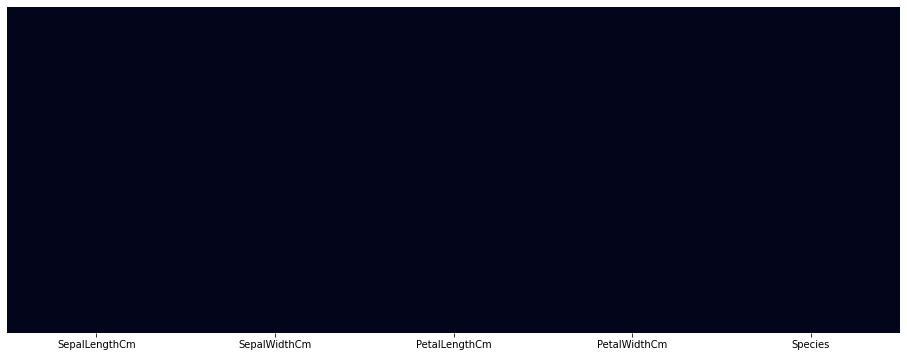

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

### There are no missing values in dataset

# Checking for duplicates

In [13]:
data.duplicated().sum()

3

# Removing duplicates

In [14]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

# Checking outliers in dataset using boxplot & treat them accordingly

In [15]:
def diagnostic_plots(df, variable):
    

    # define figure size
    plt.figure(figsize=(16, 4))

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

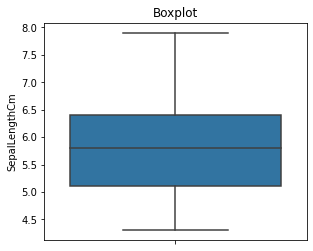

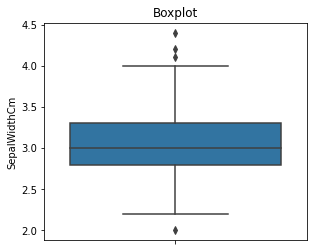

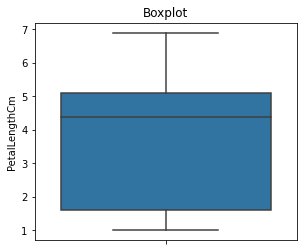

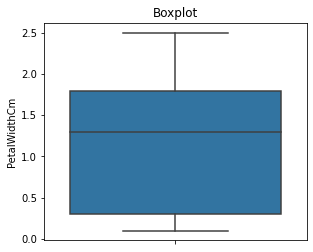

In [16]:
diagnostic_plots(data, 'SepalLengthCm')
diagnostic_plots(data, 'SepalWidthCm')
diagnostic_plots (data, 'PetalLengthCm')
diagnostic_plots(data, 'PetalWidthCm')

There are outliers in SepalWidthCm column, treating them with the help of InterQuartile Range

In [19]:
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

ur = Q3+1.5*IQR
lr = Q1-1.5*IQR

samp = data.index[data['SepalWidthCm'] > ur]
samp.append(data.index[data['SepalWidthCm'] < lr])
data = data.drop(samp)
data.reset_index(drop=True)

Int64Index([60], dtype='int64')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
139,6.7,3.0,5.2,2.3,Iris-virginica
140,6.3,2.5,5.0,1.9,Iris-virginica
141,6.5,3.0,5.2,2.0,Iris-virginica
142,6.2,3.4,5.4,2.3,Iris-virginica


# <font color='red'> EDA ( Exploratory Data Analysis) </font>

In [20]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        45
Name: Species, dtype: int64

# Species wise countplot

<Figure size 576x432 with 0 Axes>

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

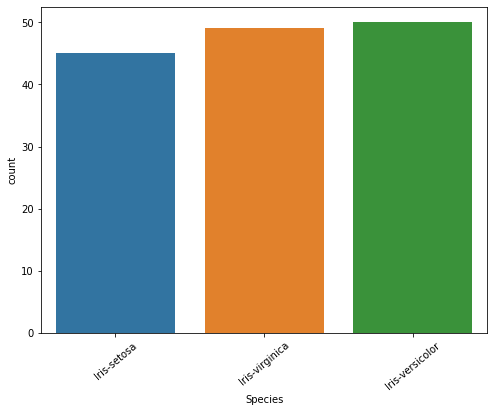

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Species',data=data,order=data['Species'].value_counts().sort_values().index);
plt.xticks(rotation=40)

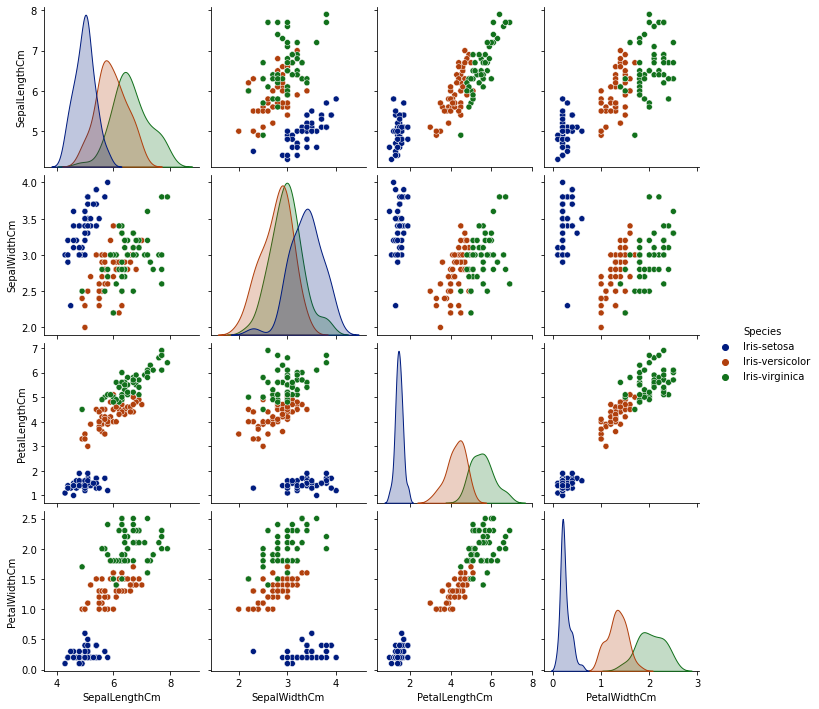

In [22]:
sns.pairplot(data,hue='Species',palette='dark')

In [23]:
# Checking categorical features
ctgrl_features = data.select_dtypes(exclude=[np.number])
ctgrl_features.describe()

,Species
count,144
unique,3
top,Iris-versicolor
freq,50


In [24]:
# Checking numerical features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [25]:
#checking variance for numeric varibales
var = numeric_features.var()
var

SepalLengthCm    0.697688
SepalWidthCm     0.164961
PetalLengthCm    3.044708
PetalWidthCm     0.565717
dtype: float64

In [26]:
#checking corelation between numeric features
corr = numeric_features.corr()
print(corr['PetalLengthCm'].sort_values(ascending=False))

PetalLengthCm    1.000000
PetalWidthCm     0.960754
SepalLengthCm    0.876956
SepalWidthCm    -0.384019
Name: PetalLengthCm, dtype: float64


<font color='blue'>from above analysys we can say that PetalLengthCm & SepalWidthCm are not correlated with each other where PetalLengthCm & PetalWidthCm are highly correlated with each other.</font>

# Correlation Matrix

<Figure size 720x576 with 0 Axes>

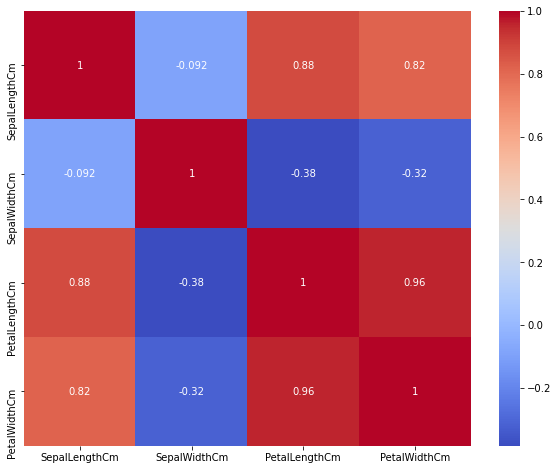

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Finding optimum number of clusters for k-means classification

In [28]:
x = data.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Sum_Squares')

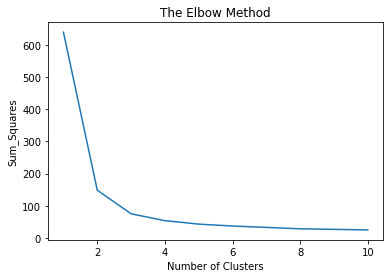

In [29]:
sum_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sum_squares.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), sum_squares)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_Squares')
plt.show()

From above graph we choose the number of clusters as 3.

# Creating the kmeans classifier

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters On Species Column

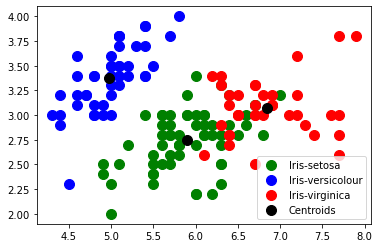

In [31]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [32]:
data['cluster'] = kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [33]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

0    61
1    45
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        45
Name: Species, dtype: int64

In [34]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


# Classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        45
           2       0.95      0.73      0.83        49

    accuracy                           0.90       144
   macro avg       0.91      0.90      0.90       144
weighted avg       0.91      0.90      0.89       144



# Confusion Matrix

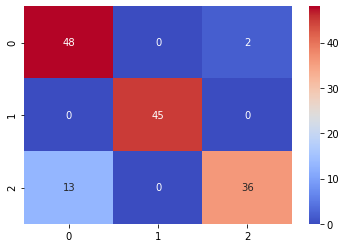

In [37]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True,cmap='coolwarm');

# Preparing Train & Test dataset

In [38]:
X= data.iloc[:,:4].values
#X

In [39]:
y = data['Species']
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

# Splitting Train-Test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# Training the model

In [41]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
model=DTC.fit(X_train,y_train)

# Predicting the model

In [42]:
y_pred=DTC.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10)

,Actual,Predicted
7,Iris-setosa,Iris-setosa
94,Iris-versicolor,Iris-versicolor
102,Iris-virginica,Iris-virginica
27,Iris-setosa,Iris-setosa
115,Iris-virginica,Iris-virginica
133,Iris-virginica,Iris-versicolor
64,Iris-versicolor,Iris-versicolor
23,Iris-setosa,Iris-setosa
134,Iris-virginica,Iris-versicolor
17,Iris-setosa,Iris-setosa


In [43]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

90.9090909090909

# Visualization of Decision Tree

[Text(523.125, 1223.1, 'PetalWidthCm <= 0.8\nentropy = 1.58\nsamples = 100\nvalue = [30, 37, 33]\nclass = Iris-versicolor'),
 Text(348.75, 951.3, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = Iris-setosa'),
 Text(697.5, 951.3, 'PetalWidthCm <= 1.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 37, 33]\nclass = Iris-versicolor'),
 Text(348.75, 679.5, 'SepalLengthCm <= 7.05\nentropy = 0.18\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(174.375, 407.69999999999993, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(523.125, 407.69999999999993, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(1046.25, 679.5, 'PetalLengthCm <= 4.85\nentropy = 0.2\nsamples = 33\nvalue = [0, 1, 32]\nclass = Iris-virginica'),
 Text(871.875, 407.69999999999993, 'SepalWidthCm <= 3.1\nentropy = 0.92\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(697.5, 135.89999999999986, 'entropy = 0.0\nsamples = 2\nvalu

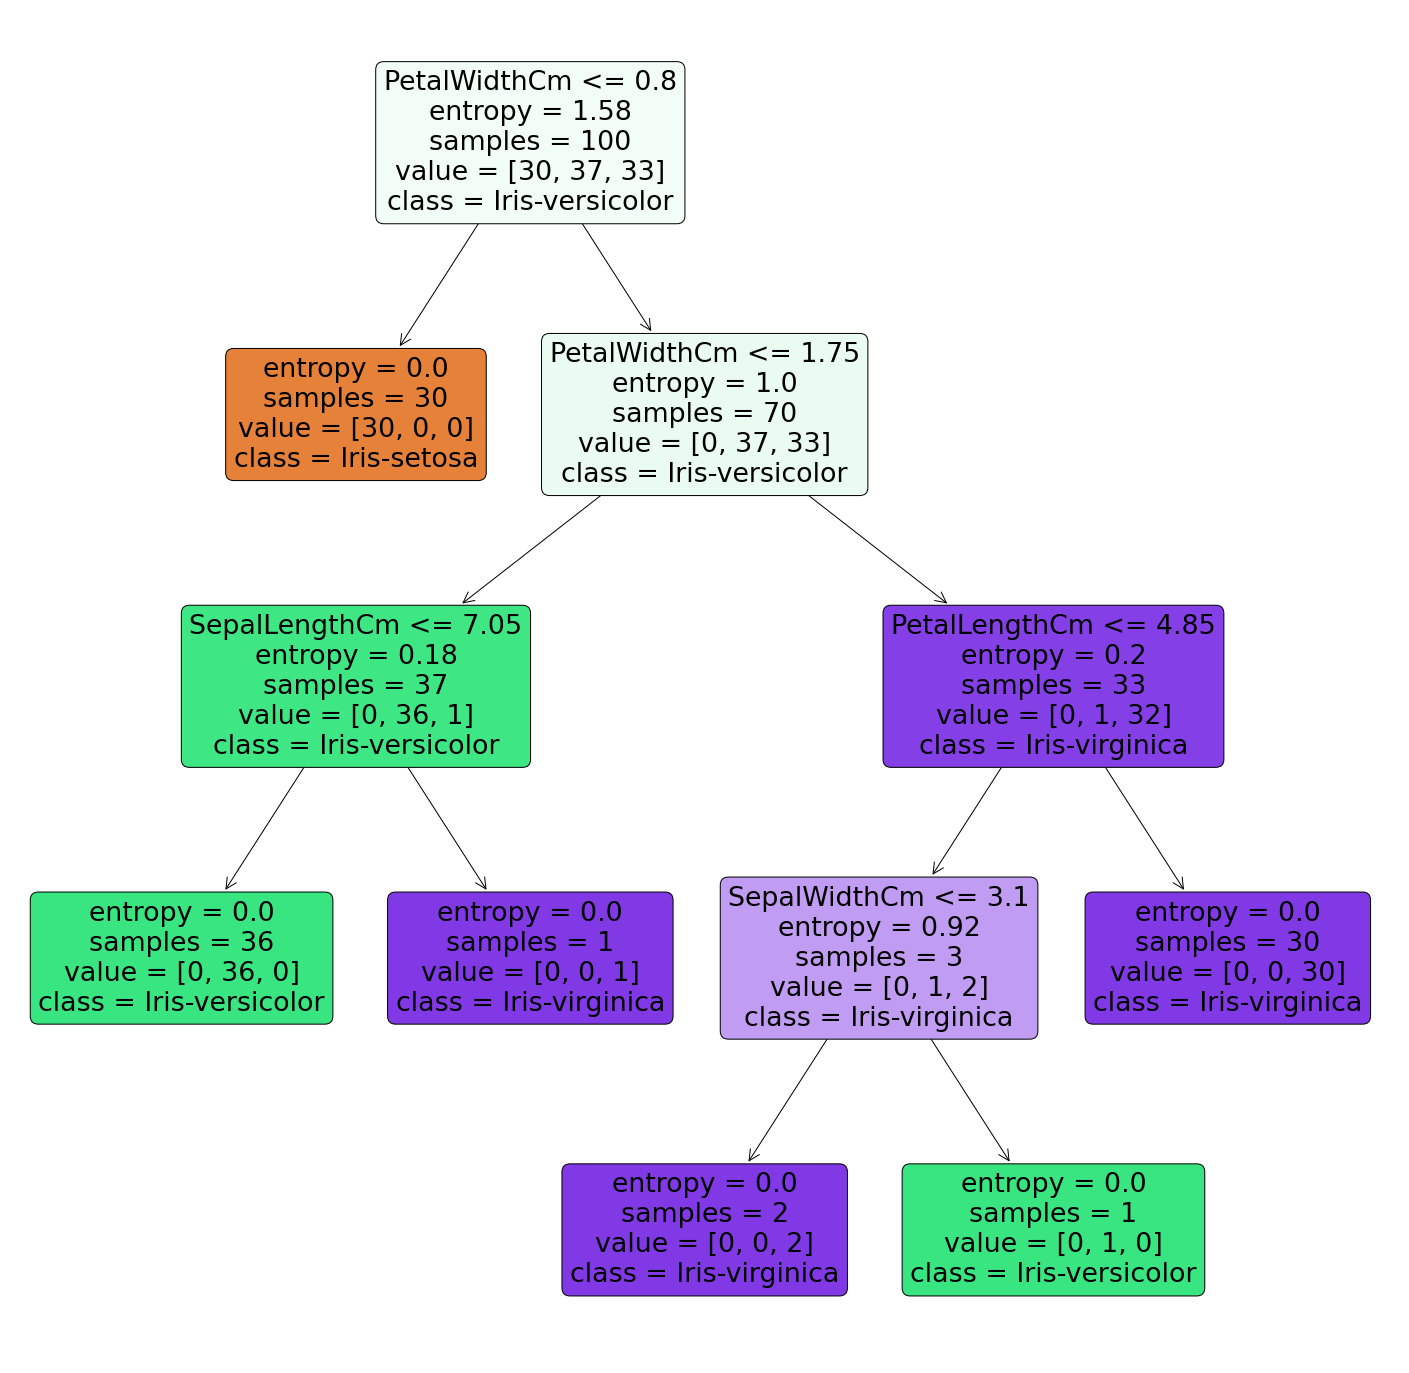

In [44]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig=plt.figure(figsize=(25,25))
tree.plot_tree(DTC, feature_names=features , class_names=species,filled=True ,precision=2,rounded=True)

# Model evaluation 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.75      0.86        16

       accuracy                           0.91        44
      macro avg       0.92      0.92      0.91        44
   weighted avg       0.93      0.91      0.91        44



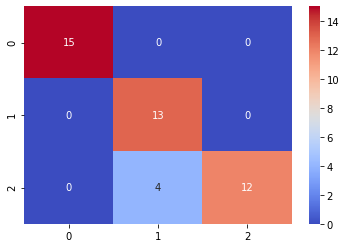

In [45]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')

### <font color='lightbrown'> Decision Tree Model has been created and visualized with the accuracy of 91% & will predict the right class when feeded with new data to this classifier.